<a href="https://colab.research.google.com/github/Hozefa-L/hozefa.github.io/blob/Neural-Network-and-Deep-Learning-Course(SUNY-Binghamton))/NNDLHW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf


In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test , y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = tf.expand_dims(x_train, axis=-1)
x_test = tf.expand_dims(x_test, axis=-1)
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))


Train: X=(60000, 28, 28, 1), y=(60000,)
Test: X=(10000, 28, 28, 1), y=(10000,)


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)), 
  tf.keras.layers.MaxPooling2D((2, 2)),                               
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])


In [ ]:
predictions = model(x_train[:1]).numpy()
predictions



array([[ 0.45140648,  0.8669158 , -0.24890845, -0.1515798 , -0.6078398 ,
         1.6573017 ,  0.05001862,  1.850287  , -0.34007734, -0.37011233]],
      dtype=float32)

In [ ]:
tf.nn.softmax(predictions).numpy()

array([[0.07777139, 0.11783472, 0.03860797, 0.04255457, 0.02696466,
        0.2597368 , 0.05205942, 0.31502566, 0.03524381, 0.03420099]],
      dtype=float32)

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()

1.3480865

In [ ]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.3258 - accuracy: 0.9004 - val_loss: 0.0574 - val_accuracy: 0.9824
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0641 - accuracy: 0.9808 - val_loss: 0.0436 - val_accuracy: 0.9854
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0392 - accuracy: 0.9874 - val_loss: 0.0392 - val_accuracy: 0.9860
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0275 - accuracy: 0.9905 - val_loss: 0.0441 - val_accuracy: 0.9857
Epoch 5/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0220 - accuracy: 0.9923 - val_loss: 0.0401 - val_accuracy: 0.9882
Epoch 6/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0169 - accuracy: 0.9942 - val_loss: 0.0404 - val_accuracy: 0.9887
Epoch 7/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0127 - accuracy: 0.9955 - val_loss: 0.0414 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


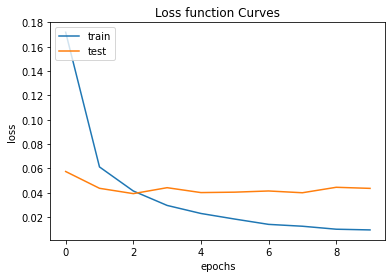

In [ ]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss function Curves')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','test'], loc='upper left')
plt.show()

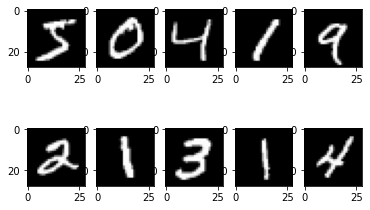

In [ ]:
for i in range(10):
	x_train=tf.squeeze(x_train)
	pyplot.subplot(2,5, i+1)
	# plot raw pixel data
	pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

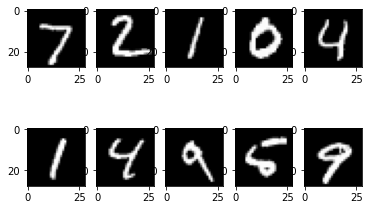

In [ ]:
for i in range(10):
	x_test=tf.squeeze(x_test)
	pyplot.subplot(2,5, i+1)
	# plot raw pixel data
	pyplot.imshow(x_test[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()